# Analise Socioeconomica sobre os participantes do enem 2019

In [ ]:
# Primeiro passo é importar as bibliotecas a serem usadas nesta analise

In [1]:
import pandas as pd

In [ ]:
# Colocar os dados dentro de uma variavel

In [37]:
microdadosenem = pd.read_csv('microdados_enem_2019/dados/microdados_enem_2019.csv', sep = ';', encoding = 'ISO-8859-1' )

MemoryError: Unable to allocate 32.0 KiB for an array with shape (4096,) and data type int64

In [ ]:
# Ver as colunas que os dados tem

In [4]:
microdadosenem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [ ]:
# Criar uma variavel com as colunas que você vai usar

In [5]:
colunasselecionadas = ['NU_INSCRICAO', 'NU_NOTA_MT','NU_NOTA_REDACAO','Q001','Q002']

In [ ]:
# Colocar dentro de uma variavel os dados dessas colunas selecionadas

In [6]:
microdadosenemselecionado =  microdadosenem.filter(items = colunasselecionadas)

In [7]:
microdadosenemselecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
0,190001595656,NaN,NaN,B,B
1,190001421546,NaN,NaN,C,E
2,190001133210,NaN,NaN,E,E
3,190001199383,392.0,460.0,C,E
4,190001237802,677.0,860.0,E,E


In [ ]:
# Para retirar essas siglas 'NaN' =(NOT A NUMBER) usa-se o .dropna redirecionando a informação para a mesma variavel

In [8]:
microdadosenemselecionado = microdadosenemselecionado.dropna()

In [9]:
microdadosenemselecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002
3,190001199383,392.0,460.0,C,E
4,190001237802,677.0,860.0,E,E
5,190001782198,675.3,800.0,B,B
6,190001421548,594.7,600.0,E,B
9,190001592266,480.7,400.0,E,E


In [ ]:
# Definindo um dicionario

In [11]:
q001e002dicionario = {'A':'Nunca estudou',
 'B':'Não completou a 4° serie/5° ano do Ensino Fundamental',
 'C':'Completou a 4° serie/5° ano mas não completou a 8° serie/9° ano',
 'D':'Completou a 8° serie/9° ano do Ensino Fundamental, mas não completou o Ensino Médio',
 'E':'Completou o Ensino Médio, mas não completou a Faculdade',
 'F':'Completou a Faculdade, mas não completou a Pós-graduação',
 'G':'Completou a Pós-graduação',
 'H':'Não Sei'}

In [12]:
microdadosenemselecionado.filter(items=['Q001','NU_INSCRICAO']).groupby('Q001').count()

,NU_INSCRICAO
Q001,
A,186186
B,752563
C,515785
D,433193
E,1006255
F,308319
G,193529
H,306177


In [13]:
microdadosenemselecionado['NO_Q001'] = [q001e002dicionario[resp] for resp in microdadosenemselecionado.Q001]

In [14]:
microdadosenemselecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001
3,190001199383,392.0,460.0,C,E,Completou a 4° serie/5° ano mas não completou ...
4,190001237802,677.0,860.0,E,E,"Completou o Ensino Médio, mas não completou a ..."
5,190001782198,675.3,800.0,B,B,Não completou a 4° serie/5° ano do Ensino Fund...
6,190001421548,594.7,600.0,E,B,"Completou o Ensino Médio, mas não completou a ..."
9,190001592266,480.7,400.0,E,E,"Completou o Ensino Médio, mas não completou a ..."


In [15]:
microdadosenemselecionado['NO_Q002'] = [q001e002dicionario[resp] for resp in microdadosenemselecionado.Q002]

In [16]:
microdadosenemselecionado.head()

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,NO_Q001,NO_Q002
3,190001199383,392.0,460.0,C,E,Completou a 4° serie/5° ano mas não completou ...,"Completou o Ensino Médio, mas não completou a ..."
4,190001237802,677.0,860.0,E,E,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ..."
5,190001782198,675.3,800.0,B,B,Não completou a 4° serie/5° ano do Ensino Fund...,Não completou a 4° serie/5° ano do Ensino Fund...
6,190001421548,594.7,600.0,E,B,"Completou o Ensino Médio, mas não completou a ...",Não completou a 4° serie/5° ano do Ensino Fund...
9,190001592266,480.7,400.0,E,E,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ..."


In [ ]:
# analisando o nivel de escolaridade do paix

In [23]:
microdadosenemselecionado.filter(items=['NU_INSCRICAO','NO_Q001']).groupby('NO_Q001').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
NO_Q001,
"Completou o Ensino Médio, mas não completou a Faculdade",1006255
Não completou a 4° serie/5° ano do Ensino Fundamental,752563
Completou a 4° serie/5° ano mas não completou a 8° serie/9° ano,515785
"Completou a 8° serie/9° ano do Ensino Fundamental, mas não completou o Ensino Médio",433193
"Completou a Faculdade, mas não completou a Pós-graduação",308319
Não Sei,306177
Completou a Pós-graduação,193529
Nunca estudou,186186


In [ ]:
# analisando o nivel de escolaridade da mâe

In [24]:
microdadosenemselecionado.filter(items=['NU_INSCRICAO','NO_Q002']).groupby('NO_Q002').count().sort_values(by='NU_INSCRICAO', ascending=False)

,NU_INSCRICAO
NO_Q002,
"Completou o Ensino Médio, mas não completou a Faculdade",1234774
Não completou a 4° serie/5° ano do Ensino Fundamental,551516
"Completou a 8° serie/9° ano do Ensino Fundamental, mas não completou o Ensino Médio",475782
Completou a 4° serie/5° ano mas não completou a 8° serie/9° ano,471827
"Completou a Faculdade, mas não completou a Pós-graduação",416291
Completou a Pós-graduação,333159
Nunca estudou,121022
Não Sei,97636


In [ ]:
# analisando o desempenho em matematica segundo paixmae
# Analisando as notas dos alunos em matematica em comparação com o nivel de estudo do paix

In [25]:
microdadosenemselecionado.filter(items=['NU_NOTA_MT','NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_MT', ascending=False)

,NU_NOTA_MT
NO_Q001,
Completou a Pós-graduação,624.118011
"Completou a Faculdade, mas não completou a Pós-graduação",600.305733
"Completou o Ensino Médio, mas não completou a Faculdade",538.924218
"Completou a 8° serie/9° ano do Ensino Fundamental, mas não completou o Ensino Médio",515.746985
Completou a 4° serie/5° ano mas não completou a 8° serie/9° ano,505.398424
Não Sei,495.478053
Não completou a 4° serie/5° ano do Ensino Fundamental,486.456585
Nunca estudou,466.098351


In [30]:
q001redacao=microdadosenemselecionado.filter(items=['NU_NOTA_MT','NO_Q001']).groupby('NO_Q001').mean().sort_values(by='NU_NOTA_MT', ascending=False)

<AxesSubplot:xlabel='NO_Q001'>

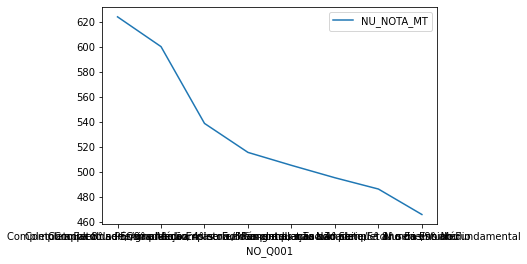

In [32]:
q001redacao.plot()

In [ ]:
# Analisando as notas dos alunos em matematica em comparação com o nivel de estudo da mãe

In [26]:
microdadosenemselecionado.filter(items=['NU_NOTA_MT','NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_MT', ascending=False)

,NU_NOTA_MT
NO_Q002,
Completou a Pós-graduação,598.916796
"Completou a Faculdade, mas não completou a Pós-graduação",583.324021
"Completou o Ensino Médio, mas não completou a Faculdade",528.317356
"Completou a 8° serie/9° ano do Ensino Fundamental, mas não completou o Ensino Médio",505.045830
Completou a 4° serie/5° ano mas não completou a 8° serie/9° ano,496.050296
Não Sei,484.997643
Não completou a 4° serie/5° ano do Ensino Fundamental,480.071887
Nunca estudou,459.859393


In [ ]:
# Colocando essa informação em uma variavel para criar um grafico

In [28]:
q002redacao=microdadosenemselecionado.filter(items=['NU_NOTA_MT','NO_Q002']).groupby('NO_Q002').mean().sort_values(by='NU_NOTA_MT', ascending=False)

<AxesSubplot:xlabel='NO_Q002'>

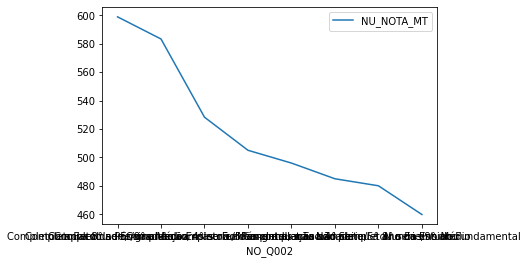

In [29]:
q002redacao.plot()

In [ ]:
# usando describe

In [33]:
microdadosenemselecionado.filter(items=['NU_NOTA_MT','NO_Q001']).groupby('NO_Q001').describe()

NU_NOTA_MT              \
                                                        count        mean   
NO_Q001                                                                     
Completou a 4° serie/5° ano mas não completou a...   515785.0  505.398424   
Completou a 8° serie/9° ano do Ensino Fundament...   433193.0  515.746985   
Completou a Faculdade, mas não completou a Pós-...   308319.0  600.305733   
Completou a Pós-graduação                            193529.0  624.118011   
Completou o Ensino Médio, mas não completou a F...  1006255.0  538.924218   
Nunca estudou                                        186186.0  466.098351   
Não Sei                                              306177.0  495.478053   
Não completou a 4° serie/5° ano do Ensino Funda...   752563.0  486.456585   

                                                                            \
                                                           std  min    25%   
NO_Q001                                                                      
Completou a 4° serie/5° ano mas não completou a...   95.982002  0.0  429.4   
Completou a 8° serie/9° ano do Ensino Fundament...  100.145656  0.0  435.5   
Completou a Faculdade, mas não completou a Pós-...  120.528311  0.0  503.7   
Completou a Pós-graduação                           122.577443  0.0  531.4   
Completou o Ensino Médio, mas não completou a F...  108.538415  0.0  449.6   
Nunca estudou                                        78.333538  0.0  407.2   
Não Sei                                              93.502969  0.0  422.7   
Não completou a 4° serie/5° ano do Ensino Funda...   87.399502  0.0  418.6   

                                                                         
                                                      50%    75%    max  
NO_Q001                                                                  
Completou a 4° serie/5° ano mas não completou a...  486.3  568.5  984.2  
Completou a 8° serie/9° ano do Ensino Fundament...  497.3  584.1  985.0  
Completou a Faculdade, mas não completou a Pós-...  605.1  688.9  985.5  
Completou a Pós-graduação                           634.1  713.1  985.5  
Completou o Ensino Médio, mas não completou a F...  524.5  617.6  985.5  
Nunca estudou                                       447.5  507.2  953.0  
Não Sei                                             474.6  552.8  985.0  
Não completou a 4° serie/5° ano do Ensino Funda...  467.2  538.8  985.0

In [36]:
microdadosenemselecionado.filter(items=['NU_NOTA_REDACAO','NO_Q001']).groupby('NO_Q001').describe()

NU_NOTA_REDACAO  \
                                                             count   
NO_Q001                                                              
Completou a 4° serie/5° ano mas não completou a...        515785.0   
Completou a 8° serie/9° ano do Ensino Fundament...        433193.0   
Completou a Faculdade, mas não completou a Pós-...        308319.0   
Completou a Pós-graduação                                 193529.0   
Completou o Ensino Médio, mas não completou a F...       1006255.0   
Nunca estudou                                             186186.0   
Não Sei                                                   306177.0   
Não completou a 4° serie/5° ano do Ensino Funda...        752563.0   

                                                                            \
                                                          mean         std   
NO_Q001                                                                      
Completou a 4° serie/5° ano mas não completou a...  558.370329  175.472064   
Completou a 8° serie/9° ano do Ensino Fundament...  574.553882  176.014692   
Completou a Faculdade, mas não completou a Pós-...  673.474421  170.940237   
Completou a Pós-graduação                           700.475174  169.925860   
Completou o Ensino Médio, mas não completou a F...  604.810272  175.241446   
Nunca estudou                                       496.082520  180.969010   
Não Sei                                             537.062092  182.576335   
Não completou a 4° serie/5° ano do Ensino Funda...  532.604420  172.019074   

                                                                              \
                                                    min    25%    50%    75%   
NO_Q001                                                                        
Completou a 4° serie/5° ano mas não completou a...  0.0  480.0  560.0  640.0   
Completou a 8° serie/9° ano do Ensino Fundament...  0.0  500.0  580.0  680.0   
Completou a Faculdade, mas não completou a Pós-...  0.0  580.0  660.0  800.0   
Completou a Pós-graduação                           0.0  600.0  700.0  840.0   
Completou o Ensino Médio, mas não completou a F...  0.0  520.0  600.0  700.0   
Nunca estudou                                       0.0  420.0  520.0  600.0   
Não Sei                                             0.0  460.0  560.0  640.0   
Não completou a 4° serie/5° ano do Ensino Funda...  0.0  460.0  560.0  620.0   

                                                            
                                                       max  
NO_Q001                                                     
Completou a 4° serie/5° ano mas não completou a...  1000.0  
Completou a 8° serie/9° ano do Ensino Fundament...  1000.0  
Completou a Faculdade, mas não completou a Pós-...  1000.0  
Completou a Pós-graduação                           1000.0  
Completou o Ensino Médio, mas não completou a F...  1000.0  
Nunca estudou                                       1000.0  
Não Sei                                             1000.0  
Não completou a 4° serie/5° ano do Ensino Funda...  1000.0

In [ ]:
# Analisando as notas ciencias da natureza (NU_NOTA_CN), 
#ciencias humanas ('NU_NOTA_CH'),
#Linguagens, Códigos e suas Tecnologias ('NU_NOTA_LC')